### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# setting few options 
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

### Loading the data

In [3]:
sealevel_data = pd.read_csv('epa-sea-level.csv')
sealevel_data.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000,-0.953,0.953,NaN
1,1881,0.220,-0.732,1.173,NaN
2,1882,-0.441,-1.346,0.465,NaN
3,1883,-0.232,-1.130,0.665,NaN
4,1884,0.591,-0.283,1.465,NaN


In [4]:
# Good practice to work with a copy of the original data
sealevel = sealevel_data.copy()

In [6]:
# analyzing the dataframe
sealevel.isna().sum(), sealevel.shape

# there are null values in the NoAA column. 

(Year                          0
 CSIRO Adjusted Sea Level      0
 Lower Error Bound             0
 Upper Error Bound             0
 NOAA Adjusted Sea Level     113
 dtype: int64,
 (134, 5))

In [9]:
sealevel.loc[~sealevel['NOAA Adjusted Sea Level'].isna()].head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
113,1993,6.291,6.028,6.555,6.297
114,1994,6.500,6.236,6.764,6.311
115,1995,6.618,6.354,6.882,6.453
116,1996,6.787,6.524,7.051,6.628
117,1997,7.067,6.803,7.331,6.734


##### Q1. Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.

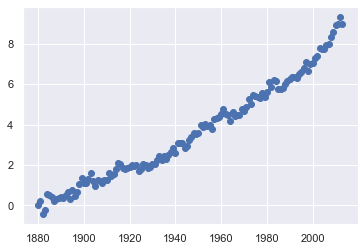

In [11]:
x = sealevel['Year']
y = sealevel['CSIRO Adjusted Sea Level']

plt.scatter(x, y)

#### Q2. Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

In [12]:
from scipy.stats import  linregress as lr
slope, intercept, r_value, p_value, std_err = lr(x,y)


In [20]:
intercept

-119.06594196773978

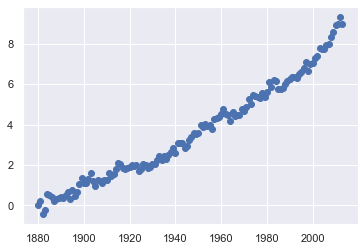

In [26]:
#plt.plot(intercept)
plt.scatter(x, y)

(-1.0355688083726844, 9.820216427446319)

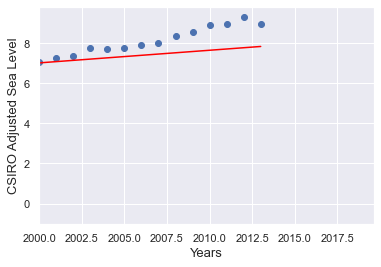

In [37]:
# the regression line will be given by
y_hat = intercept + slope*x

plt.scatter(x,y)
plt.plot(x,y_hat, color='red')

plt.xlabel('Years', fontsize=13)
plt.ylabel('CSIRO Adjusted Sea Level', fontsize=13)

plt.xlim(2000)
plt.ylim()

In [36]:
y_hat_2050 = intercept + slope*2050
y_hat_2050

10.175455257136548

#### Q2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [184]:
page

17876.4

In [185]:
pageviews_filtered = pageviews.loc[ ( pageviews['value'] >= pageviews['value'].quantile(0.025) ) & ( pageviews['value'] <= pageviews['value'].quantile(0.975) )]

In [186]:
pageviews_filtered.shape, pageviews.shape


((1238, 2), (1304, 2))

#### Q2. Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

In [187]:
# let's build the line plot function

def draw_line_plot(df, x_axis, y_axis, label_x, label_y, title, **kwargs):

    plt.figure(figsize=(15,5))
    line_plt = plt.plot(df[x_axis], df[y_axis])

    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    plt.show()

    return line_plt


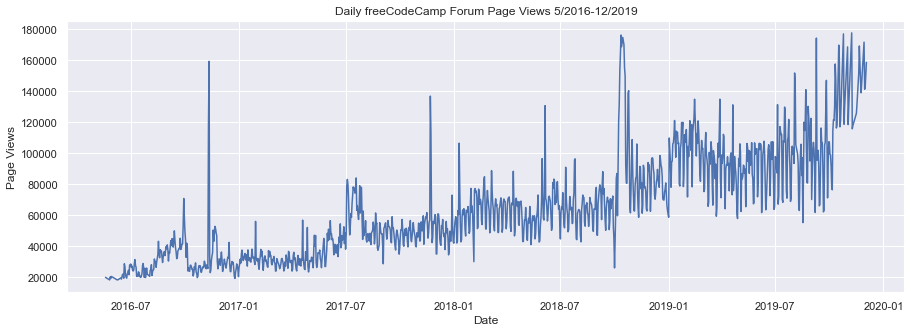

In [188]:
x = 'date'
y = 'value'
t = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'

draw_line_plot(pageviews_filtered, y_axis=y, x_axis=x, title=t, label_x= 'Date', label_y='Page Views' )

##### Q3. Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [202]:
pageviews_filtered.set_index('date', inplace=True)


,Page_Views,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5
...,...,...,...
2019-11-24,138875,2019,11
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11


In [190]:
pageviews_filtered['year'] = pageviews_filtered.index.year
pageviews_filtered['month'] = pageviews_filtered.index.month


C:\Users\LIZEGB~1\AppData\Local\Temp/ipykernel_27988/1479898144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pageviews_filtered['year'] = pageviews_filtered.index.year
C:\Users\LIZEGB~1\AppData\Local\Temp/ipykernel_27988/1479898144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pageviews_filtered['month'] = pageviews_filtered.index.month


In [191]:
pageviews_filtered

,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5
...,...,...,...
2019-11-24,138875,2019,11
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11


In [203]:
pageviews_filtered.rename(columns= {'value': 'Page_Views'}, inplace=True)

C:\Users\Liz Egbuchulam\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [204]:
pageviews_filtered

,Page_Views,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5
...,...,...,...
2019-11-24,138875,2019,11
2019-11-29,171584,2019,11
2019-11-30,141161,2019,11


In [205]:
grouped_data = pageviews_filtered.groupby(by=['year', 'month'] ).mean()

In [206]:
grouped_data

Page_Views
year month            
2016 5       19432.400
     6       21875.105
     7       24109.679
     8       31049.194
     9       41476.867
...                ...
2019 8      102717.310
     9       97268.833
     10     122802.273
     11     143166.429
     12     150733.500

[44 rows x 1 columns]

In [194]:
# the month column has integers instead of the months in letters. Let's change that
import calendar
calendar.month_abbr[5]

'May'

In [212]:

months = ["January", "February", "March", "April", "May", \
            "June", "July", "August", "September", "October", "November", "December"]

# map the months column to the months variable
grouped_data['month'] = [calendar.month_abbr[d] for d in grouped_data.index[0]]

IndexError: list index out of range

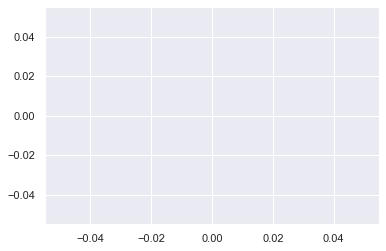

In [ ]:
media_plot = plt.plot(kind='bar', data=

#### Q4. Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly. The boilerplate includes commands to prepare the data.